In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid") 

In [54]:
#read results
# df0 = pd.read_csv('EP_intensity_boxplot.csv', index_col=0)
df0 = pd.read_csv('EP_BOXPLOT_with_CONSENSUS.csv', index_col=0)

# df0 = df0.rename(columns={"HURR_STAT_COMP": "HURR_STAT_TD","Consensus_HURR_STAT_COMP":"Consensus_HURR_STAT_TD"})
df0.columns = df0.columns.str.replace("_2016","")

In [55]:
df0.columns

Index(['HURR_STAT_TRANSFO', 'HURR_STAT_TRANSFO_2012', 'SHIP', 'TRUTH', 'HWRF',
       'OFCL', 'FSSE', 'GFSO', 'DSHP', 'Consensus_wo_HURR',
       'Consensus_HURR_STAT_TRANSFO', 'HURR_STAT_GRU', 'HURR_STAT_GRU_2012',
       'Consensus_HURR_STAT_GRU', 'HURR_STAT_COMP', 'HURR_STAT_COMP_2012',
       'Consensus_HURR_STAT_COMP', 'HURR_STAT', 'HURR_STAT_2012',
       'Consensus_HURR_STAT', 'HURR_GRU_ONLY', 'HURR_GRU_ONLY_2012',
       'Consensus_HURR_GRU_ONLY', 'HURR_TRANSFO_ONLY',
       'HURR_TRANSFO_ONLY_2012', 'Consensus_HURR_TRANSFO_ONLY',
       'HURR_STAT_TRANSFO_COMP', 'HURR_STAT_TRANSFO_COMP_2012',
       'Consensus_HURR_STAT_TRANSFO_COMP',
       'CONSENSUS_HURR_4_XGB_ElasticNet_MAE', 'CONSENSUS_HURR_4_XGB_MLP_MSE'],
      dtype='object')

In [28]:
def get_mae(df, truth):
    for col in df.columns:
        df[col] = abs(df[col] - truth)
    return df 

In [29]:
def show_boxplot(df, truth, colors): 
    for col in df.columns:
#         df[col] = np.log(abs(df[col] - truth)) 
        df[col] = abs(df[col] - truth)
    sns.set_style("whitegrid") 
    ax = sns.boxplot(data=df, showfliers=False, whisklty = 0, palette = colors)
#     ax = sns.violinplot(data=df, showfliers=False, showmeans=True, palette = colors)
#     ax = sns.barplot(data = df, estimator=mean, palette = colors)
#     ax = sns.stripplot(data=df,palette = colors)
    
    
    plt.setp(ax.get_xticklabels(), rotation=30)
    ax.set(ylabel='Mean Absolute Error')
#     if savepath:
    print(df.describe())
    return 

In [56]:
def show_lineplot(df, ci, colors, y_lim, figsize, out_path=None): 
    plt.figure(figsize=figsize) 
    ax = sns.pointplot(data=df, ci=ci, join = False, palette = colors, markers="s", capsize=0.1, scale=1.2)
    plt.setp(ax.get_xticklabels(), rotation=30)
    plt.tight_layout()
    ax.set(ylabel='Mean Absolute Error')
    plt.ylim(y_lim)   
    if out_path !=None:
        plt.savefig(out_path)
    return ax 

<ipython-input-28-0d2c39c6f45e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = abs(df[col] - truth)


<AxesSubplot:ylabel='Mean Absolute Error'>

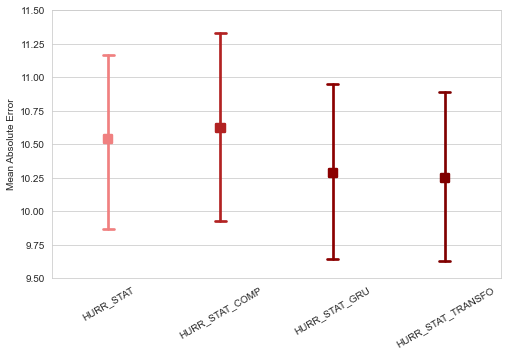

In [57]:
# subset to columns: conclusion 1 
set1 = ['HURR_STAT','HURR_STAT_COMP','HURR_STAT_GRU','HURR_STAT_TRANSFO'] #'HURR_TRANSFO_ONLY', 
colors =['lightcoral','firebrick','darkred','maroon']
df = get_mae(df0[set1], df0['TRUTH'])
show_lineplot(df, ci=95, colors=colors, y_lim=(9.5, 11.5),figsize=(7,5), out_path = None) #, out_path = 'cl1_ep_int.png' 
# show_boxplot(df[set1],df0['TRUTH'], colors)
# plt.savefig()


<ipython-input-28-0d2c39c6f45e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = abs(df[col] - truth)


<AxesSubplot:ylabel='Mean Absolute Error'>

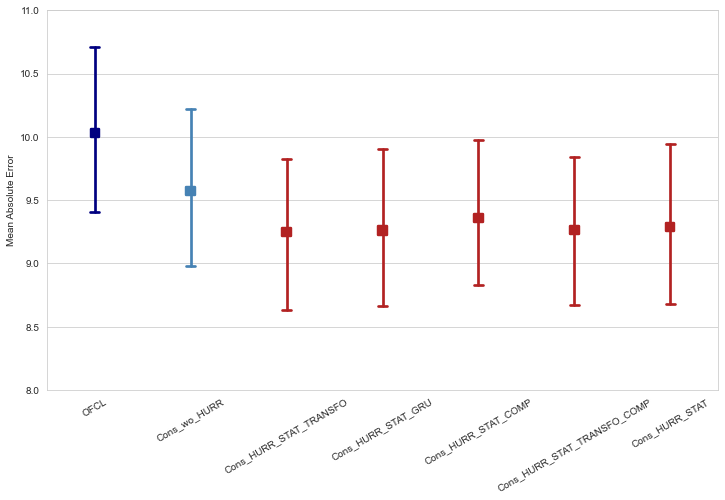

In [102]:
#conclusion 2: 
# set2 = ['OFCL','Consensus_wo_HURR','Consensus_HURR_STAT','Consensus_HURR_STAT_COMP','Consensus_HURR_STAT_TRANSFO', 'Consensus_HURR_STAT_GRU']


set2 = ['OFCL','Consensus_wo_HURR', 'Consensus_HURR_STAT_TRANSFO', 'Consensus_HURR_STAT_GRU',  
        'Consensus_HURR_STAT_COMP', 'Consensus_HURR_STAT_TRANSFO_COMP',
       'Consensus_HURR_STAT'] 
# 'Consensus_HURR_TRANSFO_ONLY'] 
#        
#        'CONSENSUS_HURR_4_XGB_ElasticNet_MAE', 'CONSENSUS_HURR_4_XGB_MLP_MSE']

colors =['navy','steelblue','firebrick','firebrick','firebrick','firebrick','firebrick']
# show_boxplot(df[set2],df0['TRUTH'], colors) 
df = get_mae(df0[set2], df0['TRUTH'])
df.columns = df.columns.str.replace("Consensus_","Cons_")
show_lineplot(df, ci=95, colors=colors, y_lim=(8, 11) , figsize = (10,7) , out_path = None ) #'cl2_ep_int.png' 


<ipython-input-28-0d2c39c6f45e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = abs(df[col] - truth)


<AxesSubplot:ylabel='Mean Absolute Error'>

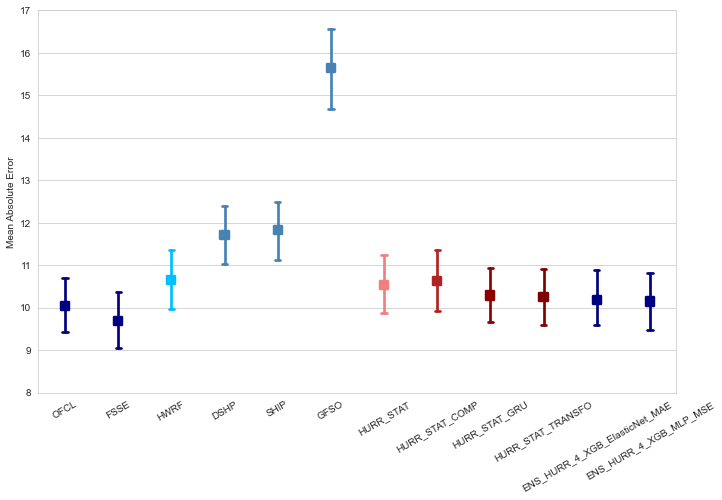

In [106]:
#conclusion 3: 
set3= ['OFCL','FSSE','HWRF','DSHP','SHIP','GFSO',
       'HURR_STAT','HURR_STAT_COMP','HURR_STAT_GRU','HURR_STAT_TRANSFO', 
       'CONSENSUS_HURR_4_XGB_ElasticNet_MAE', 'CONSENSUS_HURR_4_XGB_MLP_MSE']
colors =['navy','navy','deepskyblue','steelblue','steelblue', 'steelblue',
         'lightcoral','firebrick','darkred','maroon']

df = get_mae(df0[set3], df0['TRUTH'])
df.columns = df.columns.str.replace("CONSENSUS","ENS") #ensemble of HURR
show_lineplot(df, ci=95, colors=colors,y_lim=(8, 17) , figsize = (10,7), out_path = None ) #= 'cl3_ep_int.png'